In [ ]:
##imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import plotly.express as px
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv(
    "/content/job_descriptions.csv",
    engine="python",
    on_bad_lines="warn"
)


/tmp/ipython-input-872250743.py:1: ParserWarning: Skipping line 2908: ',' expected after '"'

  df = pd.read_csv(
/tmp/ipython-input-872250743.py:1: ParserWarning: Skipping line 7777: ',' expected after '"'

  df = pd.read_csv(
/tmp/ipython-input-872250743.py:1: ParserWarning: Skipping line 12635: ',' expected after '"'

  df = pd.read_csv(
/tmp/ipython-input-872250743.py:1: ParserWarning: Skipping line 15554: ',' expected after '"'

  df = pd.read_csv(
/tmp/ipython-input-872250743.py:1: ParserWarning: Skipping line 19434: ',' expected after '"'

  df = pd.read_csv(
/tmp/ipython-input-872250743.py:1: ParserWarning: Skipping line 21381: ',' expected after '"'

  df = pd.read_csv(
/tmp/ipython-input-872250743.py:1: ParserWarning: Skipping line 22354: ',' expected after '"'

  df = pd.read_csv(
/tmp/ipython-input-872250743.py:1: ParserWarning: Skipping line 27217: ',' expected after '"'

  df = pd.read_csv(
/tmp/ipython-input-872250743.py:1: ParserWarning: Skipping line 32067: unexpected 

In [ ]:
# Dataset Structure and Properties

# Display dataset dimensions (number of rows and columns)
print("Dataset Dimensions:",df.shape)


# Create and display a structured summary of dataset features
df_info = pd.DataFrame({
    "Column Name": df.dtypes.index,
    "Data Type": df.dtypes.values,
    "Sample Values": [df[col].dropna().unique()[:5] for col in df.columns]  # Show up to 3 unique sample values
})

print("\nDataset Features:")
display(df_info)

Dataset Dimensions: (32049, 23)

Dataset Features:


Column Name Data Type  \
0             Job Id     int64   
1         Experience    object   
2     Qualifications    object   
3       Salary Range    object   
4           location    object   
5            Country    object   
6           latitude    object   
7          longitude   float64   
8          Work Type    object   
9       Company Size   float64   
10  Job Posting Date    object   
11        Preference    object   
12    Contact Person    object   
13           Contact    object   
14         Job Title    object   
15              Role    object   
16        Job Portal    object   
17   Job Description    object   
18          Benefits    object   
19            skills    object   
20  Responsibilities    object   
21           Company    object   
22   Company Profile    object   

                                        Sample Values  
0   [1089843540111562, 398454096642776, 4816400729...  
1   [5 to 15 Years, 2 to 12 Years, 0 to 12 Years, ...  
2                        [M.Tech, BCA, PhD, MBA, MCA]  
3   [$59K-$99K, $56K-$116K, $61K-$104K, $65K-$91K,...  
4    [Douglas, Ashgabat, Macao, Porto-Novo, Santiago]  
5   [Isle of Man, Turkmenistan, Macao SAR, China, ...  
6       [54.2361, 38.9697, 22.1987, 9.3077, -35.6751]  
7      [-4.5481, 59.5563, 113.5439, 2.3158, -71.5429]  
8   [Intern, Temporary, Full-Time, Contract, Part-...  
9     [26801.0, 100340.0, 84525.0, 129896.0, 53944.0]  
10  [2022-04-24, 2022-12-19, 2022-09-14, 2023-02-2...  
11                               [Female, Male, Both]  
12  [Brandon Cunningham, Francisco Larsen, Gary Gi...  
13  [001-381-930-7517x737, 461-509-4216, 968761950...  
14  [Digital Marketing Specialist, Web Developer, ...  
15  [Social Media Manager, Frontend Web Developer,...  
16  [Snagajob, Idealist, Jobs2Careers, FlexJobs, I...  
17  [Social Media Managers oversee an organization...  
18  [{'Flexible Spending Accounts (FSAs), Relocati...  
19  [Social media platforms (e.g., Facebook, Twitt...  
20  [Manage and grow social media accounts, create...  
21  [Icahn Enterprises, PNC Financial Services Gro...  
22  [{"Sector":"Diversified","Industry":"Diversifi...

In [ ]:
##number of duplicated rows
duplicate_num = df.duplicated().sum()
print("Number of duplicated rows:", duplicate_num)

Number of duplicated rows: 0


In [ ]:
#display duplicated rows
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Job Id, Experience, Qualifications, Salary Range, location, Country, latitude, longitude, Work Type, Company Size, Job Posting Date, Preference, Contact Person, Contact, Job Title, Role, Job Portal, Job Description, Benefits, skills, Responsibilities, Company, Company Profile]
Index: []

[0 rows x 23 columns]


In [ ]:
#double check
print(df.shape)
print(df.duplicated().any())


(32049, 23)
False


In [ ]:
#deleting duplicated rows
df = df.drop_duplicates()
print("after removing duplicates:", df.shape)

after removing duplicates: (32049, 23)


In [ ]:
##number of missing values per each column
null_num = df.isnull().sum()
print("Missing values per column:")
print(null_num)

Missing values per column:
Job Id                0
Experience            0
Qualifications        0
Salary Range          0
location              0
Country               0
latitude              0
longitude             1
Work Type             1
Company Size          1
Job Posting Date      1
Preference            1
Contact Person        1
Contact               1
Job Title             1
Role                  1
Job Portal            1
Job Description       1
Benefits              3
skills                5
Responsibilities      9
Company              12
Company Profile     108
dtype: int64


In [ ]:
#display rows with missing values
missing_rows = df[df.isnull().any(axis=1)]
missing_rows.head()

Job Id     Experience Qualifications Salary Range  \
110   2758708236284517   3 to 8 Years         B.Tech    $59K-$94K   
482   1256176335840374  3 to 13 Years         B.Tech   $62K-$117K   
1690  1253050484312391   2 to 9 Years            BBA   $63K-$104K   
1935  2039370553102752  4 to 11 Years          B.Com   $55K-$130K   
1962   883635045602305  0 to 10 Years             BA   $60K-$112K   

         location         Country latitude  longitude  Work Type  \
110   George Town  Cayman Islands  19.3133   -81.2546  Part-Time   
482      Brussels         Belgium  50.5039     4.4699  Full-Time   
1690        Dhaka      Bangladesh   23.685    90.3563  Full-Time   
1935         Oslo          Norway   60.472     8.4689     Intern   
1962     Torshavn   Faroe Islands  61.8926    -6.9118   Contract   

      Company Size  ...               Contact               Job Title  \
110        86718.0  ...            7906673931  Database Administrator   
482        65653.0  ...  001-620-731-2289x933               Architect   
1690       51934.0  ...         (763)697-5024        Purchasing Agent   
1935       53111.0  ...    550-537-8061x04627    Social Media Manager   
1962       34593.0  ...       +1-782-202-0684        Dental Hygienist   

                               Role       Job Portal  \
110              Database Developer      SimplyHired   
482   Sustainable Design Specialist         LinkedIn   
1690       Supply Chain Coordinator          USAJOBS   
1935           Social Media Analyst  Internships.com   
1962        Dental Hygiene Educator    CareerBuilder   

                                        Job Description  \
110   A Database Developer designs, develops, and ma...   
482   Sustainable Design Specialists incorporate eco...   
1690  A Supply Chain Coordinator manages supply chai...   
1935  Social Media Analysts analyze social media dat...   
1962  A Dental Hygiene Educator teaches dental hygie...   

                                               Benefits  \
110   {'Employee Referral Programs, Financial Counse...   
482   {'Employee Referral Programs, Financial Counse...   
1690  {'Health Insurance, Retirement Plans, Flexible...   
1935                                               None   
1962  {'Employee Assistance Programs (EAP), Tuition ...   

                                                 skills  \
110   Database design and development SQL and databa...   
482   Sustainable design principles Energy efficienc...   
1690  Supply chain logistics Inventory management Co...   
1935                                               None   
1962  Dental hygiene knowledge Teaching and instruct...   

                                       Responsibilities  \
110   Design and implement database systems, tables,...   
482   Focus on sustainable and eco-friendly architec...   
1690  Coordinate supply chain activities, including ...   
1935                                               None   
1962  Educate patients on oral hygiene practices and...   

                        Company Company Profile  
110           Peter Kiewit Sons             NaN  
482                Estée Lauder             NaN  
1690  Dunkin'Brands Group, Inc.             NaN  
1935                       None            None  
1962          Peter Kiewit Sons             NaN  

[5 rows x 23 columns]

In [ ]:
# Fill NaN with a global constant(unknown)
df["Company Profile"] = df["Company Profile"].fillna("Unknown")


In [ ]:
# display number of missing value after handeling it
df["Company Profile"] = df["Company Profile"].fillna("Unknown")

#display missing value after filling it
print("Missing values after fill:", df["Company Profile"].isnull().sum())

#display first 10 values
print("\nSample values from Company Profile column:")
print(df["Company Profile"].head(10))

#display missing rows
unknown_rows = df[df["Company Profile"] == "Unknown"]
print("\nRows where Company Profile was originally missing (now Unknown):")
print(unknown_rows.head())


Missing values after fill: 0

Sample values from Company Profile column:
0    {"Sector":"Diversified","Industry":"Diversifie...
1    {"Sector":"Financial Services","Industry":"Com...
2    {"Sector":"Insurance","Industry":"Insurance: P...
3    {"Sector":"Energy","Industry":"Mining, Crude-O...
4    {"Sector":"Energy","Industry":"Energy - Oil & ...
5    {"Sector":"Infrastructure","Industry":"Ports a...
6    {"Sector":"Logistics","Industry":"Mail, Packag...
7    {"Sector":"Transportation","Industry":"Transpo...
8    {"Sector":"Media & Entertainment","Industry":"...
9    {"Sector":"Transportation","Industry":"Railroa...
Name: Company Profile, dtype: object

Rows where Company Profile was originally missing (now Unknown):
                Job Id     Experience Qualifications Salary Range  \
110   2758708236284517   3 to 8 Years         B.Tech    $59K-$94K   
482   1256176335840374  3 to 13 Years         B.Tech   $62K-$117K   
1690  1253050484312391   2 to 9 Years            BBA   $63K-$104K  

In [ ]:
#outliers
freq = df["Job Title"].value_counts(normalize=True)
rare_values = freq[freq < 0.01]
print("Rare categories:", rare_values)


Rare categories: Job Title
Social Media Manager      0.009954
Procurement Specialist    0.009642
Landscape Architect       0.009299
Account Manager           0.009174
Content Writer            0.008987
                            ...   
Product Designer          0.002028
Key Account Manager       0.001935
Event Manager             0.001841
Market Analyst            0.001779
Financial Planner         0.001716
Name: proportion, Length: 129, dtype: float64


In [ ]:
fre = df["Company Profile"].value_counts(normalize=True)
outliers_values = fre[fre < 0.01]
print("Rare categories:", outliers_values)


Rare categories: Company Profile
Unknown                                                                                                                                                                                             0.003370
{"Sector":"Automotive","Industry":"Automotive","City":"Munich","State":"N/A","Zip":"N/A","Website":"www.bmwgroup.com","Ticker":"BMW","CEO":"Oliver Zipse"}                                          0.002590
{"Sector":"Food & Beverage","Industry":"Food Consumer Products","City":"Camden","State":"New Jersey","Zip":"8103","Website":"www.campbellsoupcompany.com","Ticker":"CPB","CEO":"Mark A. Clouse"}    0.001903
{"Sector":"Electrical Equipment","Industry":"Electrical Equipment","City":"Kochi","State":"Kerala","Zip":"682 017","Website":"www.vguard.in","Ticker":"VGUARD","CEO":"Mithun K. Chittilappilly"}    0.001841
{"Sector":"IT Services","Industry":"Information Technology Services","City":"Reston","State":"Virginia","Zip":"20190","Website":"www.leidos.com","T

In [ ]:
#STAT

In [ ]:
value_counts = df["Job Title"].value_counts()
print(value_counts)


Job Title
UX/UI Designer                  1042
Software Engineer                586
Digital Marketing Specialist     549
Network Engineer                 478
Software Tester                  416
                                ... 
Product Designer                  65
Key Account Manager               62
Event Manager                     59
Market Analyst                    57
Financial Planner                 55
Name: count, Length: 147, dtype: int64


In [ ]:
print(df["Company Profile"].value_counts())


Company Profile
Unknown                                                                                                                                                                                             108
{"Sector":"Automotive","Industry":"Automotive","City":"Munich","State":"N/A","Zip":"N/A","Website":"www.bmwgroup.com","Ticker":"BMW","CEO":"Oliver Zipse"}                                           83
{"Sector":"Food & Beverage","Industry":"Food Consumer Products","City":"Camden","State":"New Jersey","Zip":"8103","Website":"www.campbellsoupcompany.com","Ticker":"CPB","CEO":"Mark A. Clouse"}     61
{"Sector":"Electrical Equipment","Industry":"Electrical Equipment","City":"Kochi","State":"Kerala","Zip":"682 017","Website":"www.vguard.in","Ticker":"VGUARD","CEO":"Mithun K. Chittilappilly"}     59
{"Sector":"IT Services","Industry":"Information Technology Services","City":"Reston","State":"Virginia","Zip":"20190","Website":"www.leidos.com","Ticker":"LDOS","CEO":"Thomas A. Bell"}

In [ ]:
#most frequent
print(df["Job Title"].value_counts().head(10))
print("-----------------------------------------")
print(df["skills"].value_counts().head(10))
print("-----------------------------------------")
print(df["Salary Range"].value_counts().head(10))


Job Title
UX/UI Designer                  1042
Software Engineer                586
Digital Marketing Specialist     549
Network Engineer                 478
Software Tester                  416
Procurement Manager              396
Executive Assistant              396
Financial Advisor                388
Sales Representative             368
Administrative Assistant         368
Name: count, dtype: int64
-----------------------------------------
skills
Interaction design principles User behavior and psychology Wireframing and prototyping tools Animation and micro-interaction design Collaborative design processes                                                                                              440
Network management Troubleshooting Network security IT certifications (e.g., CCNA)                                                                                                                                                                              333
User-centered design prin

In [ ]:
#least frequent
print(df["Job Title"].value_counts().tail(10))
print("-----------------------------------------")
print(df["Salary Range"].value_counts().tail(10))
print("-----------------------------------------")
print(df["skills"].value_counts().tail(10))


Job Title
Software Developer         71
IT Administrator           70
Procurement Coordinator    69
HR Generalist              68
Network Analyst            68
Product Designer           65
Key Account Manager        62
Event Manager              59
Market Analyst             57
Financial Planner          55
Name: count, dtype: int64
-----------------------------------------
Salary Range
$59K-$80K     41
$61K-$122K    41
$59K-$110K    40
$65K-$123K    40
$62K-$86K     39
$59K-$116K    38
$61K-$123K    38
$62K-$109K    37
$60K-$116K    35
$62K-$95K     32
Name: count, dtype: int64
-----------------------------------------
skills
Training and development Performance management Learning programs Employee engagement Coaching and mentoring                                                                                                                              50
Wealth management strategies Asset allocation Estate planning Tax management Client relationship management                    

In [ ]:
#descriptive analysis

In [ ]:
#number of unique values
unique1=df["Job Title"].nunique()
print("number of unique values of Job Title is:",unique1)
unique2=df["Company Profile"].nunique()
print("number of unique values of Company Profile is:",unique2)
unique3=df["Experience"].nunique()
print("number of unique values of Experience is:",unique3)
unique4=df["Work Type"].nunique()
print("number of unique values of Work Type is:",unique4)
unique5=df["skills"].nunique()
print("number of unique values of skills is:",unique5)

number of unique values of Job Title is: 147
number of unique values of Company Profile is: 885
number of unique values of Experience is: 48
number of unique values of Work Type is: 5
number of unique values of skills is: 383


In [ ]:
#Relative frequency
freqency = df["Job Title"].value_counts(normalize=True)
print(freqency.head(10))


Job Title
UX/UI Designer                  0.032514
Software Engineer               0.018285
Digital Marketing Specialist    0.017131
Network Engineer                0.014915
Software Tester                 0.012981
Procurement Manager             0.012356
Executive Assistant             0.012356
Financial Advisor               0.012107
Sales Representative            0.011483
Administrative Assistant        0.011483
Name: proportion, dtype: float64


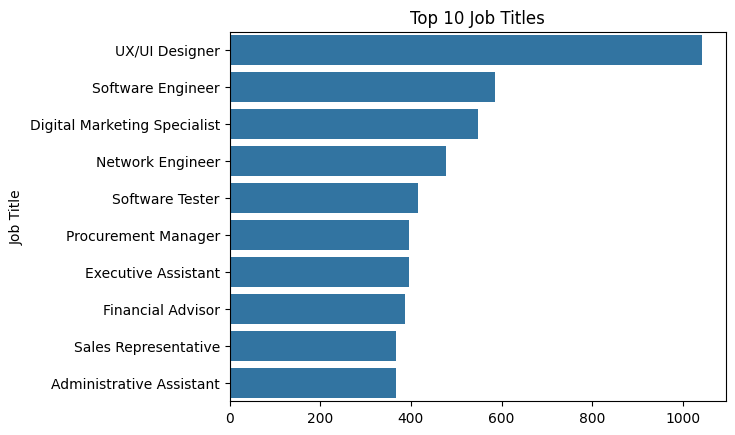

In [ ]:

#10 frequent values
top10 = df["Job Title"].value_counts().head(10)
sns.barplot(x=top10.values, y=top10.index)
plt.title("Top 10 Job Titles")
plt.show()


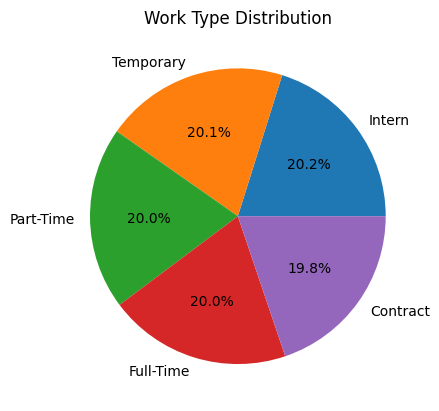

In [ ]:
df["Work Type"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Work Type Distribution")
plt.ylabel("")
plt.show()


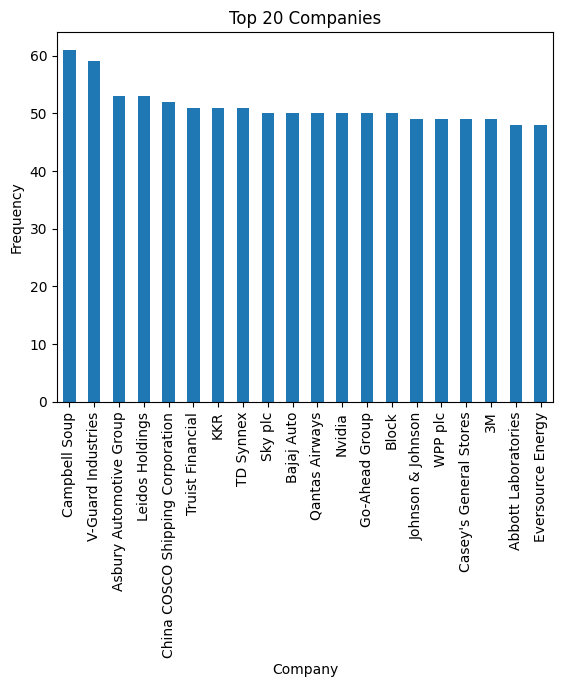

In [ ]:
company_counts = df["Company"].dropna().value_counts().head(20)
company_counts.plot(kind="bar")
plt.title("Top 20 Companies")
plt.xlabel("Company")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-3304739789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")


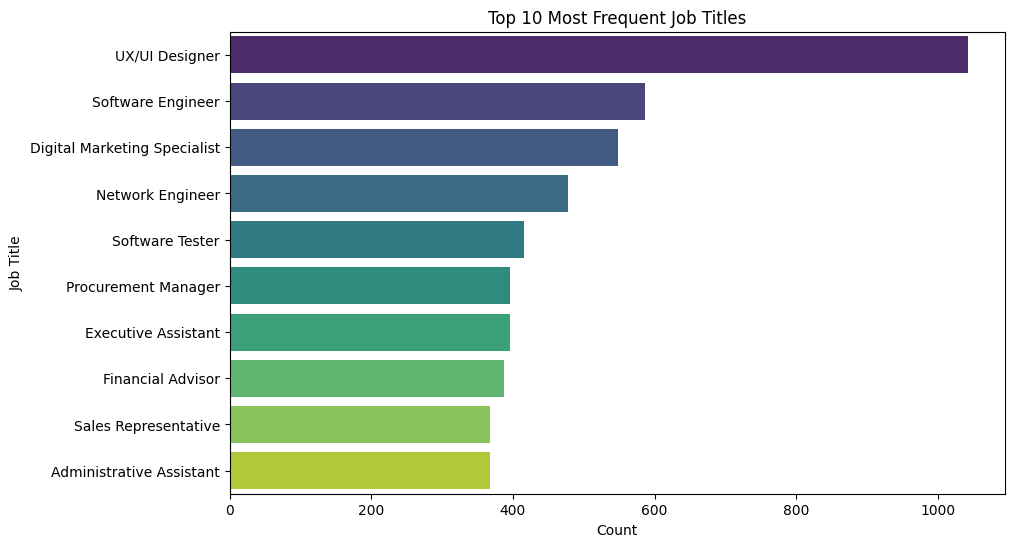

/tmp/ipython-input-3304739789.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")


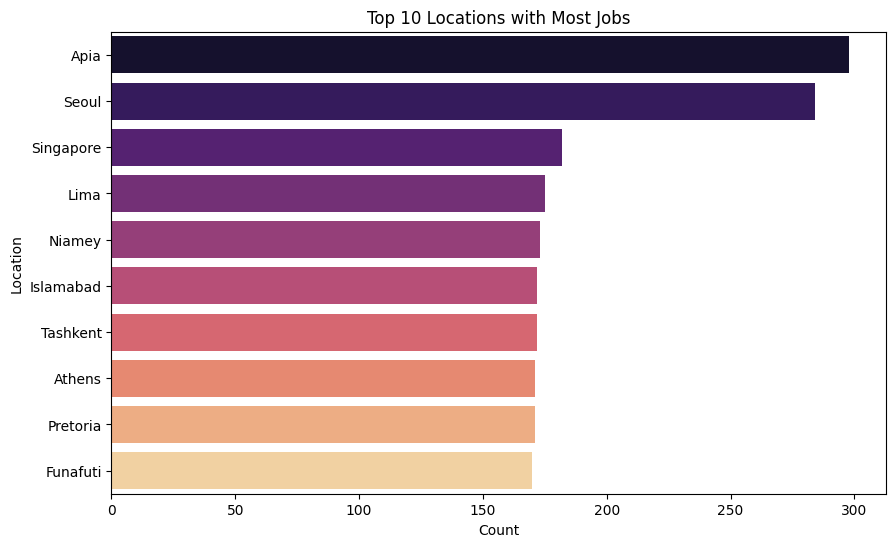

/tmp/ipython-input-3304739789.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="coolwarm")


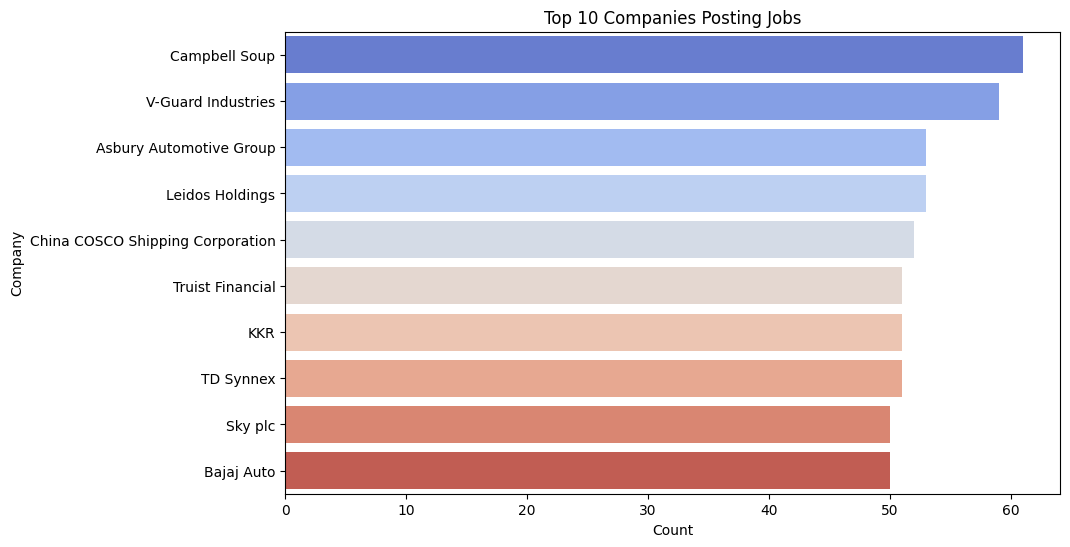

/tmp/ipython-input-3304739789.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Skill', data=skills_df, palette="plasma")


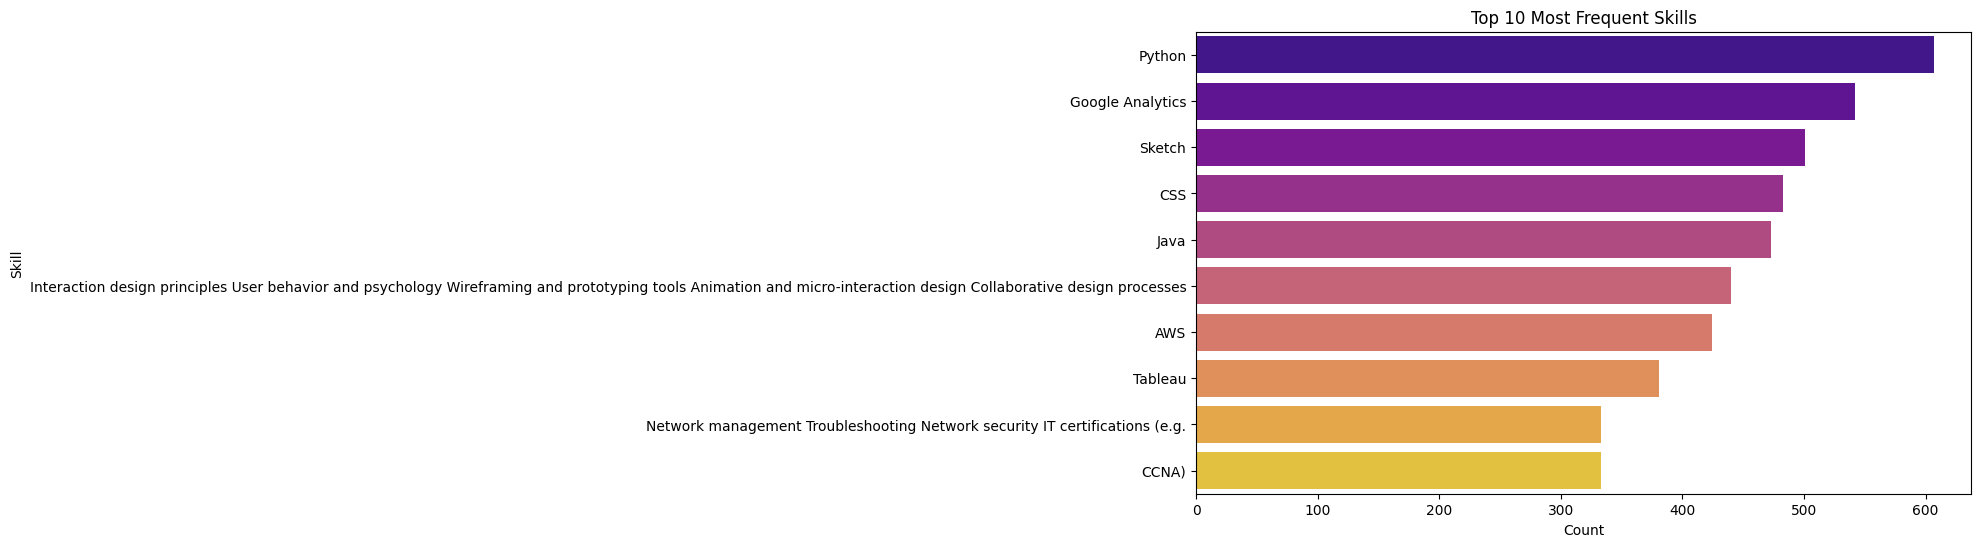


Top Job Titles:
 Job Title
UX/UI Designer                  1042
Software Engineer                586
Digital Marketing Specialist     549
Network Engineer                 478
Software Tester                  416
Procurement Manager              396
Executive Assistant              396
Financial Advisor                388
Sales Representative             368
Administrative Assistant         368
Name: count, dtype: int64

Top Locations:
 location
Apia         298
Seoul        284
Singapore    182
Lima         175
Niamey       173
Islamabad    172
Tashkent     172
Athens       171
Pretoria     171
Funafuti     170
Name: count, dtype: int64

Top Companies:
 Company
Campbell Soup                       61
V-Guard Industries                  59
Asbury Automotive Group             53
Leidos Holdings                     53
China COSCO Shipping Corporation    52
Truist Financial                    51
KKR                                 51
TD Synnex                           51
Sky plc          

In [ ]:

#Top Job Titles
plt.figure(figsize=(10,6))
top_jobs = df['Job Title'].value_counts().head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")
plt.title("Top 10 Most Frequent Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

#Top Locations
plt.figure(figsize=(10,6))
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")
plt.title("Top 10 Locations with Most Jobs")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

#Top Companies
plt.figure(figsize=(10,6))
top_companies = df['Company'].value_counts().head(10)
sns.barplot(x=top_companies.values, y=top_companies.index, palette="coolwarm")
plt.title("Top 10 Companies Posting Jobs")
plt.xlabel("Count")
plt.ylabel("Company")
plt.show()

#Skills Frequency Analysis
from collections import Counter

skills_list = df['skills'].dropna().astype(str).str.split(",")
skills_flat = [skill.strip() for sublist in skills_list for skill in sublist]

top_skills = Counter(skills_flat).most_common(10)

skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Skill', data=skills_df, palette="plasma")
plt.title("Top 10 Most Frequent Skills")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.show()
#سويته قبل
#Print summary tables
print("\nTop Job Titles:\n", df['Job Title'].value_counts().head(10))
print("\nTop Locations:\n", df['location'].value_counts().head(10))
print("\nTop Companies:\n", df['Company'].value_counts().head(10))
print("\nTop Skills:\n", skills_df)


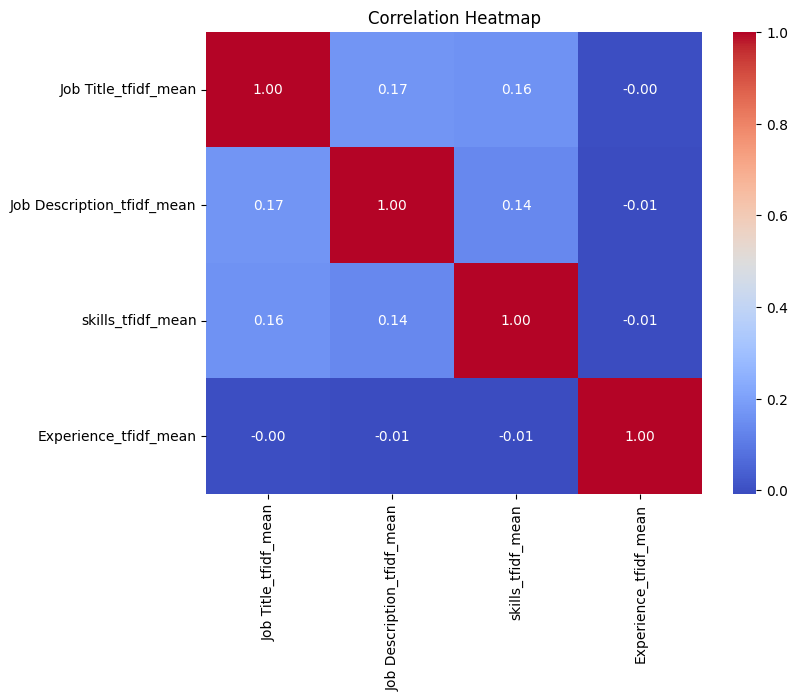

In [ ]:

cols = ["Job Title", "Job Description", "skills", "Experience"]
cols = [col for col in cols if col in df.columns]

encoded_features = pd.DataFrame()

for col in cols:
    vectorizer = TfidfVectorizer(max_features=100)
    tfidf_matrix = vectorizer.fit_transform(df[col].fillna(""))
    #taking average each row
    encoded_features[col + "_tfidf_mean"] = tfidf_matrix.mean(axis=1).A1

corr = encoded_features.corr()

#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# استخراج أقل راتب من عمود Salary Range
# حذف الصفوف التي لا تحتوي على راتب واضح
# Low و Medium و High ثم تقسيم الرواتب إلى
# لاستخدامها كمتغير هدف في التصنيف.

def extract_min_salary(x):
    if pd.isna(x):
        return np.nan
    nums = re.findall(r'\d+', str(x))
    if not nums:
        return np.nan
    return float(nums[0])

df["salary_min"] = df["Salary Range"].apply(extract_min_salary)

# حذف الصفوف اللي ما قدرنا نطلع منها راتب
df_clean = df.dropna(subset=["salary_min"]).copy()

df_clean["Salary_Level"] = pd.qcut(
    df_clean["salary_min"],
    q=3,
    labels=["Low", "Medium", "High"]
)

print(df_clean[["Salary Range", "salary_min", "Salary_Level"]].head())


  Salary Range  salary_min Salary_Level
0    $59K-$99K        59.0       Medium
1   $56K-$116K        56.0          Low
2   $61K-$104K        61.0       Medium
3    $65K-$91K        65.0         High
4    $64K-$87K        64.0         High


In [ ]:
#big DataFrame frequencies and mode of all col بوضوح mode نقدر نشوف

freq_list = []

for col in df.columns:
    counts = df[col].value_counts()
    for value, count in counts.items():
        freq_list.append([col, value, count])

freq_df = pd.DataFrame(freq_list, columns=["Column", "Value", "Frequency"])
freq_df = freq_df.sort_values("Frequency", ascending=False)

freq_df


Column             Value  Frequency
62446  Preference              Both      10716
62447  Preference              Male      10707
62448  Preference            Female      10625
33533   Work Type            Intern       6458
33534   Work Type         Temporary       6448
...           ...               ...        ...
5775       Job Id   916167992651402          1
5774       Job Id  1487006111725805          1
5773       Job Id  2915622297260474          1
5772       Job Id  1537558396439514          1
5771       Job Id  1118218936987618          1

[125042 rows x 3 columns]

In [ ]:
###prediction

In [ ]:
##########################
#aggeegate feature into 1 variable
text_columns = ["skills", "Experience", "location", "Job Description"]

# تنظيف الأعمدة لو فيها NaN
#ensuring there is not any missing values
for col in text_columns:
    df[col] = df[col].fillna("")

# دمجها في عمود نص واحد
#mearged into single col
df["text_all"] = df[text_columns].agg(" ".join, axis=1)

In [ ]:
#assin values into x,y for prediction
X = df["text_all"]
y = df["Job Title"]

In [ ]:

#spliting the data into taining 80% and testing 20% data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
#Text feature(columns) extraction and performing Classification using Logistic Regression
model = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=2000)),
    ("clf", LogisticRegression(max_iter=400))
])

In [84]:
# 1)تعريف لل هدف
target_col = 'Job Title'

features = [
    'Experience', 'Qualifications', 'Salary Range', 'Country',
    'latitude', 'longitude', 'Work Type', 'Company Size',
    'Preference', 'Role', 'Job Portal', 'Company'
]

X = df[features].copy()
y = df[target_col].copy()


In [91]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [93]:
# مثال بيانات جديدة (غيّري القيم حسب المثال)
new_job = {
    'Experience': '3-5 years',
    'Qualifications': 'Bachelor',
    'Salary Range': '10k-15k',
    'Country': 'Saudi Arabia',
    'latitude': 24.7136,
    'longitude': 46.6753,
    'Work Type': 'Full-time',
    'Company Size': 'Medium',
    'Preference': 'Onsite',
    'Role': 'Data Analyst',
    'Job Portal': 'LinkedIn',
    'Company': 'Aramco'
}

new_df = pd.DataFrame([new_job])


In [95]:
# نفس الـ One-Hot Encoding
new_df = pd.get_dummies(new_df)

# إعادة فهرسة الأعمدة عشان تطابق X_train
new_df = new_df.reindex(columns=X_train.columns, fill_value=0)

# تأكدي إنها أرقام
new_df = new_df.apply(pd.to_numeric, errors='coerce').fillna(0)


In [97]:
##making forecasting

prediction = model.predict(new_df)
print("Predicted Job Title:", prediction[0])


Predicted Job Title: Marketing Analyst


In [ ]:
########

In [ ]:

# Cleaning text function ensuring prediction made based on accurate data

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    #using regular expression
    text = re.sub(r"[^a-zA-Z0-9أ-ي\s]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text


In [ ]:

# integrate relevant columns into 1 variable

df["combined_text"] = (
    df["skills"].apply(clean_text) + " " +
    df["Experience"].apply(clean_text) + " " +
    df["location"].apply(clean_text) + " " +
    df["Job Description"].apply(clean_text)
)


In [ ]:

# Target variable(to be predicted)
y = df["Job Title"]
X = df["combined_text"]


In [ ]:

#  Split Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Building  ML model
["Job Title", "Skills", "Experience", "Location", "Job Description"]

model = Pipeline([
    ("tfidf", TfidfVectorizer(
        max_features=5000,
        ngram_range=(1,2),
    )),
    ("clf", LogisticRegression(max_iter=500))
])


In [98]:


#Train model

model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [99]:

#Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


                                     precision    recall  f1-score   support

                   Account Director       1.00      1.00      1.00        28
                  Account Executive       1.00      1.00      1.00        45
                    Account Manager       1.00      1.00      1.00        59
                         Accountant       1.00      1.00      1.00        38
           Administrative Assistant       1.00      1.00      1.00        74
                 Aerospace Engineer       1.00      1.00      1.00        43
                          Architect       1.00      1.00      1.00        58
             Architectural Designer       1.00      1.00      1.00        26
                       Art Director       1.00      1.00      1.00        41
                        Art Teacher       1.00      1.00      1.00        46
                 Back-End Developer       1.00      1.00      1.00        29
                   Brand Ambassador       1.00      1.00      1.00        4

In [100]:

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


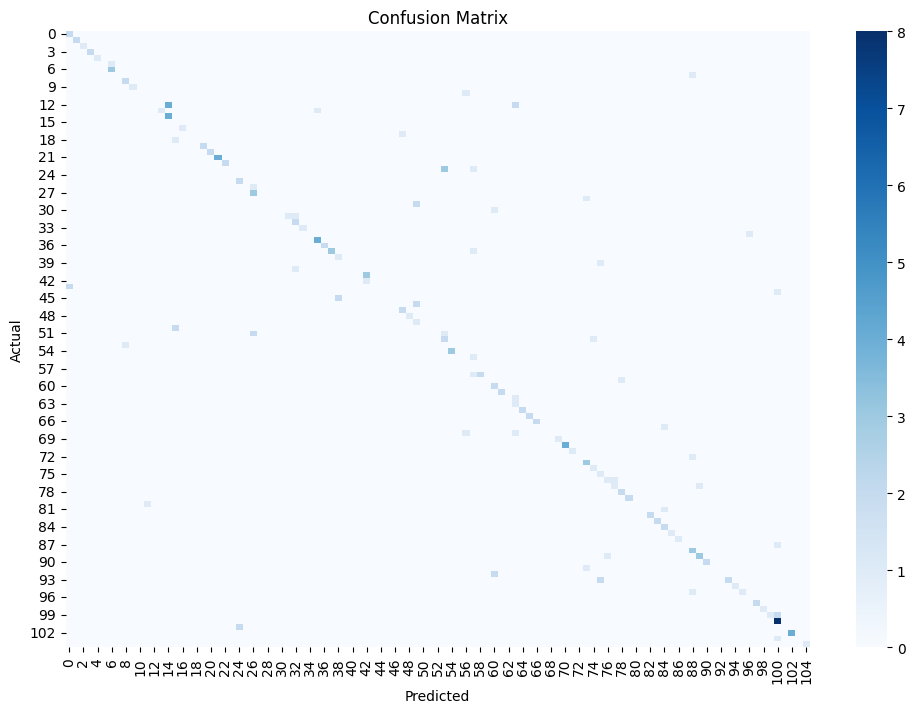

In [ ]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [102]:
## حساب مصفوفة الالتباس لتقييم أداء النموذج
# واستخراج قيم TP و FP و FN و TN
# لقياس جودة التصنيف

cm = confusion_matrix(y_test, y_pred)

TP = np.diag(cm).sum()
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (FP + FN + np.diag(cm)).sum()

print("TP:", TP)
print("FP:", FP.sum())
print("FN:", FN.sum())
print("TN:", TN)

TP: 6410
FP: 0
FN: 0
TN: 0


In [103]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 1.0


In [119]:
print(df.columns)


Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile',
       'salary_min', 'text_all', 'combined_text'],
      dtype='object')


In [127]:
#prescriptive
# التحليل التوجيهي (Prescriptive):
# اقتراح وظائف مناسبة للمستخدم بمقارنة ملفه الشخصي
# مع إعلانات الوظائف باستخدام TF-IDF و Cosine Similarity
# ثم عرض أعلى الوظائف تطابقًا



tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=5000
)

tfidf_matrix = tfidf.fit_transform(df["combined_text"])

def recommend_jobs(user_skills, user_experience, user_location, user_desc, df_jobs, top_n=5):

    user_text = " ".join([
        clean_text(user_skills),
        clean_text(user_experience),
        clean_text(user_location),
        clean_text(user_desc)
    ])

    user_vector = tfidf.transform([user_text])

    similarity = cosine_similarity(user_vector, tfidf_matrix).flatten()

    top_indices = similarity.argsort()[::-1][:top_n]

    recommendations = df_jobs.iloc[top_indices][["Job Title", "combined_text"]].copy()
    recommendations["Similarity"] = similarity[top_indices]

    return recommendations



In [105]:
# تجهيز البيانات للتصنيف نختار ايش الاشياء الي بتاثر في عرض البيانات

target_col = 'Job Title'

features = [
'Experience', 'Qualifications', 'Salary Range', 'location', 'Country',
'latitude', 'longitude', 'Work Type', 'Company Size', 'Preference',
'Role', 'Job Portal', 'Benefits', 'skills', 'Responsibilities', 'Company',
]
X = df[features].copy()
y = df[target_col]

X = pd.get_dummies(
X,
columns=[
'location', 'Country', 'Work Type', 'Company Size', 'Preference',
'Role', 'Job Portal', 'Benefits', 'skills', 'Responsibilities', 'Company'
],
drop_first=True
)
for col in ['Experience','Qualifications','Salary Range']:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))



X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2,
random_state=42,
stratify=None
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (25639, 30680)
X_test shape: (6410, 30680)


In [128]:
#للتصنيف Gaussian Naive Bayes تدريب
# للتنبؤ بالمسميات الوظيفية Job Titleاستخدام ال
X_train = X_train.fillna(0)
X_test  = X_test.fillna(0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [129]:
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text,
    y_encoded,
    test_size=0.2,
    random_state=42
)


In [130]:
nb = MultinomialNB()
nb.fit(X_train_text, y_train)


MultinomialNB()

In [ ]:
 #نقيم النموذج عن طريق التنبؤ ببيانات الاختبار
#قياس الدقة وتقرير التصنيف نشوف جودة التنبؤ

 y_pred_nb = nb.predict(X_test_text)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))



Naive Bayes Accuracy: 0.6134020618556701
              precision    recall  f1-score   support

           1       0.40      1.00      0.57         2
           2       1.00      0.50      0.67         2
           3       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       0.75      1.00      0.86         3
          10       0.00      0.00      0.00         1
          12       0.50      1.00      0.67         2
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       1.00      0.50      0.67         6
          22       1.00      0.50      0.67         2
          23       0.80      1.00      0.89         4
          24       0.00      0.00      0.00         0
          25       1.00      1.00      1

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [111]:
# ك مدخلات للنموذج Job Description ,skills,Responsibilities و target variable ك Job Titleاستخدام ال
target_col = "Job Title"

# Logistic Regression و  Naive Bayesال Two modelsمقارنة و تدريب بين ال
#نشوف الاداء و الدقة باستخدام التصنيف و اختبار الدقة
text_cols = ["Job Description", "skills", "Responsibilities"]

text_cols = [c for c in text_cols if c in df.columns]

y = df[target_col].astype(str)
tfidf_vectors = []

for col in text_cols:
    tfidf = TfidfVectorizer(
        max_features=500,
        stop_words="english"
    )
    vec = tfidf.fit_transform(df[col].fillna(""))
    tfidf_vectors.append(vec)

X_text = hstack(tfidf_vectors)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X_text,
    y_encoded,
    test_size=0.2,
    random_state=42
)
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Naive Bayes Accuracy: 0.997191887675507
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        86
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00        28
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        45
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        45
          12       1.00      1.00      1.00        44
          13       1.00      1.00      1.00        48
          14       1.00      1.00      1.00        35
          15       1.00      1.00      1.00        29
          16       1.00      1.00      1.

In [112]:
# للتحويل التنبؤ بالراتب من قيمة رقمية الي تصنيف Low / Medium / High قسمنا الراتب الي ثلاث فئات
numeric_df = df_clean.select_dtypes(include=["int64", "float64"]).copy()


# لتجنب التكرار او تسريب البيانات salary_min استبعدنا
if "salary_min" in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=["salary_min"])

X = numeric_df
y_raw = df_clean["Salary_Level"]

le_target = LabelEncoder()
y = le_target.fit_transform(y_raw)
print("Classes:", le_target.classes_)


Classes: ['High' 'Low' 'Medium']


In [113]:
##Trials###

# لكن الدقه قليلة لان عدد البيانات لايصلح مع الشجرة RandomForestتجارب للبيانات ب استخدام ال
#بعد تدريب الشجره لاكثر من مره والتنبؤ واستخدام التصنيف لتوضيح الاداء لكل معيار محاولات للتقسيم الراتب على حسب الدخل ب الشجرة
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
# RandomForest

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

# pre
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy (Salary_Level classification):", round(acc * 100, 2), "%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))


Accuracy (Salary_Level classification): 35.26 %

Classification Report:

              precision    recall  f1-score   support

        High       0.28      0.20      0.24      1766
         Low       0.38      0.43      0.40      2333
      Medium       0.36      0.39      0.37      2311

    accuracy                           0.35      6410
   macro avg       0.34      0.34      0.34      6410
weighted avg       0.35      0.35      0.35      6410

